In [15]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

datasets = ('circles0.3', 'moons1', 'spiraltest', 'twogaussians33', 'twogaussians42', 'halfkernel')

for dataset in datasets:
    print(f"Dataset: {dataset}")

    # data path
    csv_file = rf'C:\Users\grguo\Dropbox\000000000000000learning\COMP8740\SampleDatasets\{dataset}.csv'

    # Loading data
    df = pd.read_csv(csv_file)

    # Separate features and labels 
    X = df[['x1', 'x2']]
    y = df['label']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # (a) SVM-L: Linear kernel
    svm_linear = SVC(kernel='linear', C=1)  # Linear kernel with regularization parameter C=1
    svm_linear.fit(X_train, y_train)
    accuracy_linear = svm_linear.score(X_test, y_test)
    print("Linear Kernel Accuracy:", accuracy_linear)

    # (b) SVM-P: Polynomial kernel (degree 2)
    svm_poly = SVC(kernel='poly', degree=2, C=1)  # Polynomial kernel with degree 2 and C=1
    svm_poly.fit(X_train, y_train)
    accuracy_poly = svm_poly.score(X_test, y_test)
    print("Polynomial Kernel (Degree 2) Accuracy:", accuracy_poly)

    # (c) SVM-R: RBF kernel
    svm_rbf = SVC(kernel='rbf', C=1)  # RBF kernel with regularization parameter C=1
    svm_rbf.fit(X_train, y_train)
    accuracy_rbf = svm_rbf.score(X_test, y_test)
    print("RBF Kernel Accuracy:", accuracy_rbf)


Dataset: circles0.3
Linear Kernel Accuracy: 0.475
Polynomial Kernel (Degree 2) Accuracy: 1.0
RBF Kernel Accuracy: 1.0
Dataset: moons1
Linear Kernel Accuracy: 0.87
Polynomial Kernel (Degree 2) Accuracy: 0.765
RBF Kernel Accuracy: 0.99
Dataset: spiraltest
Linear Kernel Accuracy: 0.76
Polynomial Kernel (Degree 2) Accuracy: 0.475
RBF Kernel Accuracy: 0.995
Dataset: twogaussians33
Linear Kernel Accuracy: 0.995
Polynomial Kernel (Degree 2) Accuracy: 0.59
RBF Kernel Accuracy: 0.995
Dataset: twogaussians42
Linear Kernel Accuracy: 0.925
Polynomial Kernel (Degree 2) Accuracy: 0.76
RBF Kernel Accuracy: 0.935
Dataset: halfkernel
Linear Kernel Accuracy: 0.745
Polynomial Kernel (Degree 2) Accuracy: 0.78
RBF Kernel Accuracy: 1.0


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score

datasets = ('circles0.3', 'moons1', 'spiraltest', 'twogaussians33', 'twogaussians42', 'halfkernel')

for dataset in datasets:
    print(f"Dataset: {dataset}")

    # data path
    csv_file = rf'C:\Users\grguo\Dropbox\000000000000000learning\COMP8740\SampleDatasets\{dataset}.csv'

    # Loading data
    df = pd.read_csv(csv_file)

    # Separate features and labels 
    X = df[['x1', 'x2']]
    y = df['label']

        # Define custom functions for specificity, precision, and NPV
        def specificity(y_true, y_pred):
            tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
            return tn / (tn + fp)

        def npv(y_true, y_pred):
            tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
            return tn / (tn + fn)

        # Define the classifiers with default parameters
        svm_linear = SVC(kernel='linear')
        svm_poly = SVC(kernel='poly', degree=2)
        svm_rbf = SVC(kernel='rbf')

        # Define the metrics to calculate during cross-validation
        metrics = {
            'PPV': precision_score,
            'NPV': npv,
            'specificity': specificity,
            'sensitivity': recall_score,
            'accuracy': accuracy_score,
        }

        # Store results for each classifier and metric
        results = {}

        # Perform 10-fold cross-validation and calculate metrics for each classifier
        for clf, clf_name in [(svm_linear, 'SVM-L'), (svm_poly, 'SVM-P'), (svm_rbf, 'SVM-R')]:
            y_pred = cross_val_predict(clf, X, y, cv=10)

            # Store results for this classifier
            results.setdefault(clf_name, {})
            for metric_name, metric_func in metrics.items():
                results[clf_name][metric_name] = metric_func(y, y_pred)

        # Print the results
        for clf_name, clf_metrics in results.items():
            print(f"Classifier: {clf_name}")
            for metric_name, metric_value in clf_metrics.items():
                print(f"{metric_name}: {metric_value:.3f}")
            print()


Classifier: SVM-L
PPV: 0.634
NPV: 0.672
specificity: 0.491
sensitivity: 0.787
accuracy: 0.647

Classifier: SVM-P
PPV: 0.626
NPV: 0.667
specificity: 0.472
sensitivity: 0.790
accuracy: 0.640

Classifier: SVM-R
PPV: 0.635
NPV: 0.653
specificity: 0.511
sensitivity: 0.758
accuracy: 0.642



In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

datasets = ('circles0.3', 'moons1', 'spiraltest', 'twogaussians33', 'twogaussians42', 'halfkernel')

for dataset in datasets:
    print(f"Dataset: {dataset}")

    # data path
    csv_file = rf'C:\Users\grguo\Dropbox\000000000000000learning\COMP8740\SampleDatasets\{dataset}.csv'

    # Loading data
    df = pd.read_csv(csv_file)

    # Separate features and labels 
    X = df[['x1', 'x2']]
    y = df['label']

    # Define custom functions for specificity, precision, and NPV
    def specificity(y_true, y_pred):
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        return tn / (tn + fp)

    def npv(y_true, y_pred):
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        return tn / (tn + fn)

    # Define the classifiers with default parameters
    svm_linear = SVC(kernel='linear')
    svm_poly = SVC(kernel='poly', degree=2)
    svm_rbf = SVC(kernel='rbf')

    # Define the metrics to calculate during cross-validation
    metrics = {
        'PPV': precision_score,
        'NPV': npv,
        'specificity': specificity,
        'sensitivity': recall_score,
        'accuracy': accuracy_score,
    }

    # Store results for each classifier and metric
    results = {}

    # Perform 10-fold cross-validation and calculate metrics for each classifier
    for clf, clf_name in [(svm_linear, 'SVM-L'), (svm_poly, 'SVM-P'), (svm_rbf, 'SVM-R')]:
        y_pred = cross_val_predict(clf, X, y, cv=10)

        # Store results for this classifier
        results.setdefault(clf_name, {})
        for metric_name, metric_func in metrics.items():
            results[clf_name][metric_name] = metric_func(y, y_pred)

    # Print the results
    for clf_name, clf_metrics in results.items():
        print(f"Classifier: {clf_name}")
        for metric_name, metric_value in clf_metrics.items():
            print(f"{metric_name}: {metric_value:.3f}")
        print()


Dataset: circles0.3
Classifier: SVM-L
PPV: 0.578
NPV: 0.807
specificity: 0.326
sensitivity: 0.922
accuracy: 0.624

Classifier: SVM-P
PPV: 1.000
NPV: 1.000
specificity: 1.000
sensitivity: 1.000
accuracy: 1.000

Classifier: SVM-R
PPV: 1.000
NPV: 1.000
specificity: 1.000
sensitivity: 1.000
accuracy: 1.000

Dataset: moons1
Classifier: SVM-L
PPV: 0.886
NPV: 0.876
specificity: 0.888
sensitivity: 0.874
accuracy: 0.881

Classifier: SVM-P
PPV: 0.728
NPV: 0.944
specificity: 0.640
sensitivity: 0.962
accuracy: 0.801

Classifier: SVM-R
PPV: 0.998
NPV: 0.998
specificity: 0.998
sensitivity: 0.998
accuracy: 0.998

Dataset: spiraltest
Classifier: SVM-L
PPV: 0.741
NPV: 0.741
specificity: 0.742
sensitivity: 0.740
accuracy: 0.741

Classifier: SVM-P
PPV: 0.476
NPV: 0.464
specificity: 0.376
sensitivity: 0.566
accuracy: 0.471

Classifier: SVM-R
PPV: 0.986
NPV: 0.984
specificity: 0.986
sensitivity: 0.984
accuracy: 0.985

Dataset: twogaussians33
Classifier: SVM-L
PPV: 0.996
NPV: 0.988
specificity: 0.996
sensit

Dataset: circles0.3


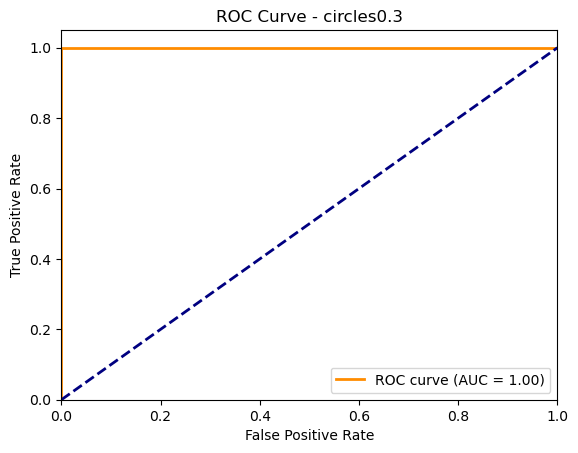

AUC for circles0.3: 1.00

Dataset: moons1


AUC for moons1: 1.00

Dataset: spiraltest


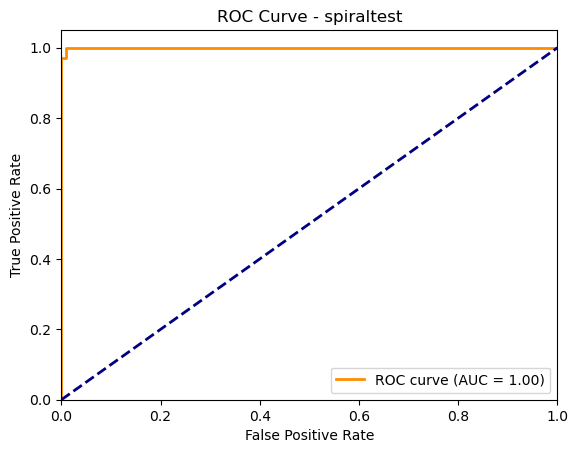

AUC for spiraltest: 1.00

Dataset: twogaussians33


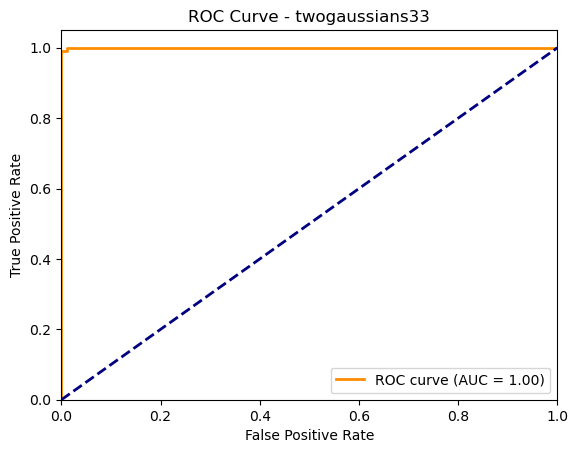

AUC for twogaussians33: 1.00

Dataset: twogaussians42


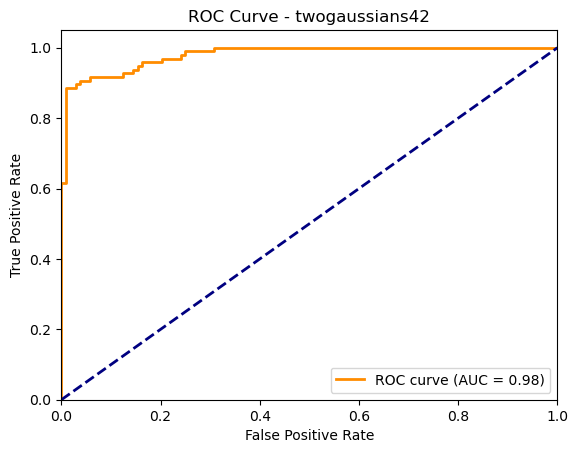

AUC for twogaussians42: 0.98

Dataset: halfkernel


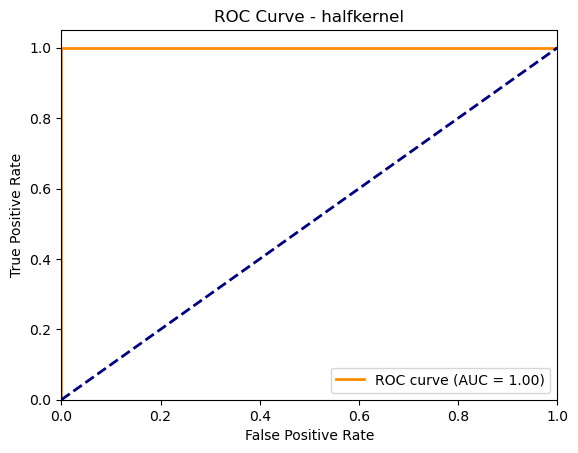

AUC for halfkernel: 1.00



In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

datasets = ('circles0.3', 'moons1', 'spiraltest', 'twogaussians33', 'twogaussians42', 'halfkernel')

for dataset in datasets:
    print(f"Dataset: {dataset}")

    # Load data
    csv_file = rf'C:\Users\grguo\Dropbox\000000000000000learning\COMP8740\SampleDatasets\{dataset}.csv'
    df = pd.read_csv(csv_file)

    # Separate features and labels
    X = df[['x1', 'x2']]
    y = df['label']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train SVM-R classifier
    svm_rbf = SVC(kernel='rbf', probability=True)
    svm_rbf.fit(X_train, y_train)

    # Predict probabilities
    y_prob = svm_rbf.predict_proba(X_test)[:, 1]

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Calculate AUC
    auc_score = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {dataset}')
    plt.legend(loc='lower right')
    plt.show()

    print(f"AUC for {dataset}: {auc_score:.2f}\n")


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

datasets = ('circles0.3', 'moons1', 'spiraltest', 'twogaussians33', 'twogaussians42', 'halfkernel')

for dataset in datasets:
    print(f"Dataset: {dataset}")

    # Load data
    csv_file = rf'C:\Users\grguo\Dropbox\000000000000000learning\COMP8740\SampleDatasets\{dataset}.csv'
    df = pd.read_csv(csv_file)

    # Separate features and labels
    X = df[['x1', 'x2']]
    y = df['label']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define parameter grid for grid search
    param_grid = {
        'kernel': ['linear', 'poly', 'rbf'],
        'C': [0.1, 1, 10],
        'gamma': [0.01, 0.1, 1],
    }

    # Create SVM classifier
    svm = SVC()

    # Perform grid search with 10-fold cross-validation based on accuracy
    grid_search = GridSearchCV(svm, param_grid, scoring='accuracy', cv=10)
    grid_search.fit(X_train, y_train)

    # Get best parameters and kernel
    best_params = grid_search.best_params_
    best_kernel = best_params.pop('kernel')

    # Train SVM classifier with best parameters
    best_svm = SVC(kernel=best_kernel, **best_params)
    best_svm.fit(X_train, y_train)

    # Predict and calculate accuracy on the test set
    y_pred = best_svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Best Kernel: {best_kernel}")
    print(f"Best Parameters: {best_params}")
    print(f"Accuracy on Test Set: {accuracy:.2f}\n")


Dataset: circles0.3
Best Kernel: rbf
Best Parameters: {'C': 0.1, 'gamma': 1}
Accuracy on Test Set: 1.00

Dataset: moons1
Best Kernel: rbf
Best Parameters: {'C': 1, 'gamma': 1}
Accuracy on Test Set: 0.99

Dataset: spiraltest
